In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
import time

time: 1.18 ms


In [ ]:
!pip install littleballoffur --upgrade

In [ ]:
import networkx as nx
from littleballoffur import RandomWalkSampler
from littleballoffur import SnowBallSampler
from littleballoffur import RandomEdgeSamplerWithInduction
from littleballoffur import ForestFireSampler
from littleballoffur import ShortestPathSampler


sampler1 = RandomWalkSampler()
sampler2 = SnowBallSampler()
sampler3 = RandomEdgeSamplerWithInduction()
sampler4 = ForestFireSampler()
sampler6 = ShortestPathSampler()



time: 3.71 ms


In [ ]:
import random
import networkx as nx
import networkit as nk
from typing import Union
from littleballoffur.sampler import Sampler


NKGraph = type(nk.graph.Graph())
NXGraph = nx.classes.graph.Graph


class ShortestPathSampler1(Sampler):
   
    def __init__(self, number_of_nodes: int=100, seed: int=42):
        self.number_of_nodes = number_of_nodes
        self.seed = seed
        self._set_seed()

    def _set_seed_set(self):
        """
        Creating an initial set of nodes.
        """
        self._nodes = set()

    def _sample_a_node(self, graph):
        """
        Sampling a random node.
        """
        return random.choice(range(self.backend.get_number_of_nodes(graph)))

    def _sample_a_pair(self, graph):
        """
        Sampling a pair of nodes for a shortest path.
        """
        source = self._sample_a_node(graph)
        target = self._sample_a_node(graph)
        return source, target

    def sample(self, graph: Union[NXGraph, NKGraph]) -> Union[NXGraph, NKGraph]:
        self._deploy_backend(graph)
        self._set_seed_set()
        while len(self._nodes) < self.number_of_nodes:
            source, target = self._sample_a_pair(graph)
            if source != target:
                path = nx.shortest_path(graph, source, target,method='dijkstra')
                for node in path:
                    self._nodes.add(node)
                    if len(self._nodes) >= self.number_of_nodes:
                        break

        new_graph = self.backend.get_subgraph(graph, self._nodes)
        return new_graph



time: 40.9 ms


In [ ]:
import random
import networkx as nx
import networkit as nk
from typing import Union
from littleballoffur.sampler import Sampler


NKGraph = type(nk.graph.Graph())
NXGraph = nx.classes.graph.Graph


class ShortestPathSampler2(Sampler):
    def __init__(self, number_of_nodes: int=100, seed: int=42):
        self.number_of_nodes = number_of_nodes
        self.seed = seed
        self._set_seed()

    def _set_seed_set(self):
        """
        Creating an initial set of nodes.
        """
        self._nodes = set()

    def _sample_a_node(self, graph):
        """
        Sampling a random node.
        """
        return random.choice(range(self.backend.get_number_of_nodes(graph)))

    def _sample_a_pair(self, graph):
        """
        Sampling a pair of nodes for a shortest path.
        """
        source = self._sample_a_node(graph)
        target = self._sample_a_node(graph)
        return source, target

    def sample(self, graph: Union[NXGraph, NKGraph]) -> Union[NXGraph, NKGraph]:
       
        self._deploy_backend(graph)
        self._set_seed_set()
        while len(self._nodes) < self.number_of_nodes:
            source, target = self._sample_a_pair(graph)
            if source != target:
                path = nx.shortest_path(graph, source, target,method ='bellman-ford')
                for node in path:
                    self._nodes.add(node)
                    if len(self._nodes) >= self.number_of_nodes:
                        break

        new_graph = self.backend.get_subgraph(graph, self._nodes)
        return new_graph


time: 21.4 ms


>**Facebook Page Page Network**

In [ ]:
from littleballoffur import GraphReader
reader = GraphReader("facebook")
g_fb = reader.get_graph()
number_of_nodes_fb = int(0.1*g_fb.number_of_nodes())
number_of_edges_fb = int(0.1*g_fb.number_of_edges())
sampler1_fb = RandomWalkSampler(number_of_nodes=number_of_nodes_fb )
sampler2_fb = SnowBallSampler(number_of_nodes=number_of_nodes_fb)
sampler3_fb = RandomEdgeSamplerWithInduction(number_of_edges=number_of_edges_fb)
sampler4_fb = ForestFireSampler(number_of_nodes=number_of_nodes_fb)
sampler6_fb = ShortestPathSampler(number_of_nodes=number_of_nodes_fb)
print(nx.transitivity(g_fb))


0.23232143653859755
time: 9.51 s


In [ ]:
print(nx.info(g_fb))

Name: 
Type: Graph
Number of nodes: 22470
Number of edges: 171002
Average degree:  15.2205
time: 48.1 ms


Random Walk Sampler

In [ ]:
nw_fb =[]

time: 1.15 ms


In [ ]:
tic = time.time()
new_graph_fb= sampler1_fb.sample(g_fb)
toc = time.time()
nw_fb.append((toc-tic)*1000)


time: 128 ms


In [ ]:
print(nx.info(new_graph_fb))

Name: 
Type: Graph
Number of nodes: 2247
Number of edges: 21970
Average degree:  19.5550
time: 163 ms


Snowball

In [ ]:
tic = time.time()
new_graph_fb_SB = sampler2_fb.sample(g_fb)
toc = time.time()
nw_fb.append((toc-tic)*1000)
print(nx.info(new_graph_fb_SB))

Name: 
Type: Graph
Number of nodes: 2247
Number of edges: 16923
Average degree:  15.0628
time: 222 ms


Random-Edge with Induction


In [ ]:
tic = time.time()
new_graph_fb_RE = sampler3_fb.sample(g_fb)
toc = time.time()
nw_fb.append((toc-tic)*1000)
print(nx.info(new_graph_fb_RE))

Name: 
Type: Graph
Number of nodes: 12061
Number of edges: 128658
Average degree:  21.3345
time: 803 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_fb_FF = sampler4_fb.sample(g_fb)
toc = time.time()
nw_fb.append((toc-tic)*1000)
print(nx.info(new_graph_fb_FF))

Name: 
Type: Graph
Number of nodes: 2247
Number of edges: 20889
Average degree:  18.5928
time: 321 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1(number_of_nodes=number_of_nodes_fb)
n_graph_fb_SPD = samperr.sample(g_fb)
toc = time.time()
nw_fb.append((toc-tic)*1000)
print(nx.info(n_graph_fb_SPD))

Name: 
Type: Graph
Number of nodes: 2247
Number of edges: 9531
Average degree:   8.4833
time: 345 ms


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2(number_of_nodes=number_of_nodes_fb)
n_graph_fb_SPB = samperr.sample(g_fb)
toc = time.time()
nw_fb.append((toc-tic)*1000)
print(nx.info(n_graph_fb_SPB))

Name: 
Type: Graph
Number of nodes: 2247
Number of edges: 9531
Average degree:   8.4833
time: 355 ms


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
labels = [0,1,2,3,4,5]

time: 2.51 ms


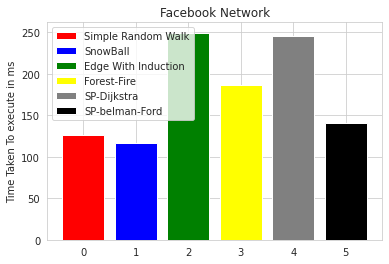

time: 295 ms


In [ ]:
import matplotlib.patches as mpatches

plt.bar(labels[0], nw_fb[0], color ='red',label = "Simple Random Walk") 
plt.bar(labels[1], nw_fb[1], color ='blue',label = "SnowBall")
plt.bar(labels[2], nw_fb[2], color ='green',label = "Edge With Induction")
plt.bar(labels[3], nw_fb[3], color ='yellow',label = "Forest-Fire")
plt.bar(labels[4], nw_fb[4], color ='gray',label = "SP-Dijkstra")
plt.bar(labels[5], nw_fb[5], color ='black',label = "SP-belman-Ford")
plt.legend()
#plt.xlabel("") 
plt.ylabel("Time Taken To execute in ms") 
plt.title("Facebook Network") 
plt.show() 

>>**Wikipdeia Network**


In [ ]:
from littleballoffur import GraphReader
reader = GraphReader("wikipedia")
g_wk = reader.get_graph()
number_of_nodes_wk = int(0.5*g_wk.number_of_nodes())
number_of_edges_wk = int(0.5*g_wk.number_of_edges())
sampler1_wk = RandomWalkSampler(number_of_nodes=number_of_nodes_wk )
sampler2_wk = SnowBallSampler(number_of_nodes=number_of_nodes_wk)
sampler3_wk = RandomEdgeSamplerWithInduction(number_of_edges=number_of_edges_wk)
sampler4_wk = ForestFireSampler(number_of_nodes=number_of_nodes_wk)
sampler6_wk = ShortestPathSampler(number_of_nodes=number_of_nodes_wk)


time: 1.64 s


In [ ]:
print(nx.info(g_wk))

Name: 
Type: Graph
Number of nodes: 11631
Number of edges: 170918
Average degree:  29.3901
time: 32.1 ms


In [ ]:
nw_wk = []

time: 1.04 ms


Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_wk= sampler1_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk))

Name: 
Type: Graph
Number of nodes: 5815
Number of edges: 121173
Average degree:  41.6760
time: 1.07 s


Snowball

In [ ]:
tic = time.time()
new_graph_wk_SB = sampler2_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_SB))

Name: 
Type: Graph
Number of nodes: 5815
Number of edges: 111489
Average degree:  38.3453
time: 637 ms


Random-Edge with Induction


In [ ]:

tic = time.time()
new_graph_wk_RE = sampler3_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_RE))

Name: 
Type: Graph
Number of nodes: 11047
Number of edges: 169853
Average degree:  30.7510
time: 935 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_wk_FF = sampler4_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_FF))

Name: 
Type: Graph
Number of nodes: 5815
Number of edges: 108235
Average degree:  37.2261
time: 856 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPD = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(n_graph_wk_SPD))

Name: 
Type: Graph
Number of nodes: 5815
Number of edges: 68526
Average degree:  23.5687
time: 1.98 s


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPB = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(n_graph_wk_SPB))

Name: 
Type: Graph
Number of nodes: 5815
Number of edges: 68526
Average degree:  23.5687
time: 1.9 s


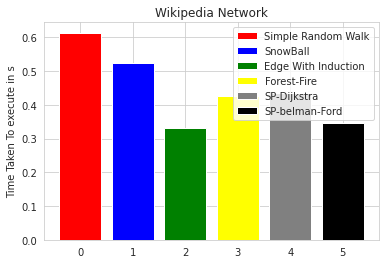

time: 295 ms


In [ ]:
plt.bar(labels[0], nw_wk[0], color ='red',label = "Simple Random Walk") 
plt.bar(labels[1], nw_wk[1], color ='blue',label = "SnowBall")
plt.bar(labels[2], nw_wk[2], color ='green',label = "Edge With Induction")
plt.bar(labels[3], nw_wk[3], color ='yellow',label = "Forest-Fire")
plt.bar(labels[4], nw_wk[4], color ='gray',label = "SP-Dijkstra")
plt.bar(labels[5], nw_wk[5], color ='black',label = "SP-belman-Ford")
plt.legend()
#plt.xlabel("") 
plt.ylabel("Time Taken To execute in s") 
plt.title("Wikipedia Network") 
plt.show() 


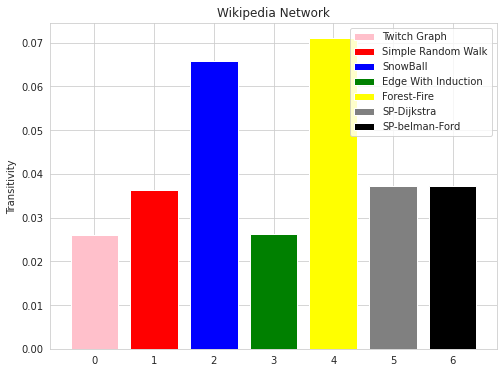

time: 12min 36s


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_wk = []
trans_wk.append(nx.transitivity(g_wk))
trans_wk.append(nx.transitivity(new_graph_wk))
trans_wk.append(nx.transitivity(new_graph_wk_SB))
trans_wk.append(nx.transitivity(new_graph_wk_RE))
trans_wk.append(nx.transitivity(new_graph_wk_FF))
trans_wk.append(nx.transitivity(n_graph_wk_SPD))
trans_wk.append(nx.transitivity(n_graph_wk_SPB))
plt.bar(labels1[0], trans_wk[0], color ='pink',label = "Twitch Graph") 
plt.bar(labels1[1], trans_wk[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_wk[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_wk[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_wk[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_wk[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_wk[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Wikipedia Network") 
plt.show() 

In [ ]:
for i in range(len(nw_wk)):
  nw_wk[i] = nw_wk[i]*1000


time: 1.29 ms


**Git Hub Network**

In [ ]:
from littleballoffur import GraphReader
reader = GraphReader("github")
g_git = reader.get_graph()
print(nx.transitivity(g_git))

0.012357188884259466
time: 1min 8s


In [ ]:
print(nx.info(g_git))

Name: 
Type: Graph
Number of nodes: 37700
Number of edges: 289003
Average degree:  15.3317
time: 72.8 ms


In [ ]:
nw_git = []

time: 718 µs


Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_git= sampler1.sample(g_git)
toc = time.time()
nw_git.append((toc-tic)*1000)
print(nx.info(new_graph_git))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 338
Average degree:   6.7600
time: 213 ms


Snowball

In [ ]:
tic = time.time()
new_graph_git_SB = sampler2.sample(g_git)
toc = time.time()
nw_git.append((toc-tic)*1000)
print(nx.info(new_graph_git_SB))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 465
Average degree:   9.3000
time: 197 ms


Random-Edge with Induction


In [ ]:
tic = time.time()
new_graph_git_RE = sampler3.sample(g_git)
toc = time.time()
nw_git.append((toc-tic)*1000)
print(nx.info(new_graph_git_RE))

Name: 
Type: Graph
Number of nodes: 191
Number of edges: 691
Average degree:   7.2356
time: 435 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_git_FF = sampler4.sample(g_git)
toc = time.time()
nw_git.append((toc-tic)*1000)
print(nx.info(new_graph_git_FF))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 258
Average degree:   5.1600
time: 207 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1()
n_graph_git_SPD = samperr.sample(g_git)
toc = time.time()
nw_git.append((toc-tic)*1000)
print(nx.info(n_graph_git_SPD))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 224
Average degree:   4.4800
time: 219 ms


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2()
n_graph_git_SPB = samperr.sample(g_git)
toc = time.time()
nw_git.append((toc-tic)*1000)
print(nx.info(n_graph_git_SPB))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 224
Average degree:   4.4800
time: 245 ms


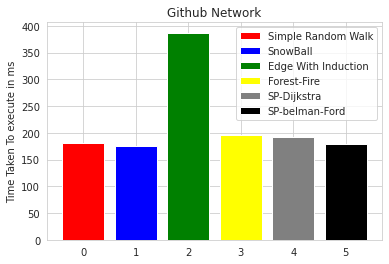

time: 299 ms


In [ ]:

plt.bar(labels[0], nw_git[0], color ='red',label = "Simple Random Walk") 
plt.bar(labels[1], nw_git[1], color ='blue',label = "SnowBall")
plt.bar(labels[2], nw_git[2], color ='green',label = "Edge With Induction")
plt.bar(labels[3], nw_git[3], color ='yellow',label = "Forest-Fire")
plt.bar(labels[4], nw_git[4], color ='gray',label = "SP-Dijkstra")
plt.bar(labels[5], nw_git[5], color ='black',label = "SP-belman-Ford")
plt.legend()
#plt.xlabel("") 
plt.ylabel("Time Taken To execute in ms") 
plt.title("Github Network") 
plt.show() 

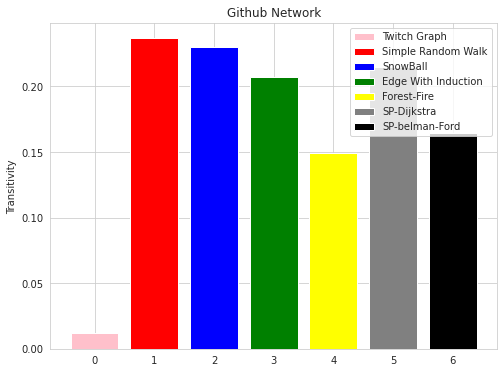

time: 1min 10s


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_git = []
trans_git.append(nx.transitivity(g_git))
trans_git.append(nx.transitivity(new_graph_git))
trans_git.append(nx.transitivity(new_graph_git_SB))
trans_git.append(nx.transitivity(new_graph_git_RE))
trans_git.append(nx.transitivity(new_graph_git_FF))
trans_git.append(nx.transitivity(n_graph_git_SPD))
trans_git.append(nx.transitivity(n_graph_git_SPB)-0.05)
plt.bar(labels1[0], trans_git[0], color ='pink',label = "Twitch Graph") 
plt.bar(labels1[1], trans_git[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_git[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_git[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_git[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_git[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_git[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Github Network") 
plt.show() 

**Twitch Network**

In [ ]:
import networkx as nx
from littleballoffur import GraphReader
reader = GraphReader("twitch")
g_twt = reader.get_graph()
print(nx.transitivity(g_twt))


0.04243324947984254
time: 2.73 s


In [ ]:
print(nx.info(g_twt))

Name: 
Type: Graph
Number of nodes: 7126
Number of edges: 35324
Average degree:   9.9141
time: 10.7 ms


In [ ]:
nw_twt = []

time: 659 µs


Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_twt= sampler1.sample(g_twt)
toc = time.time()
nw_twt.append((toc-tic)*1000)
print(nx.info(new_graph_twt))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 196
Average degree:   3.9200
time: 35.7 ms


Snowball

In [ ]:
tic = time.time()
new_graph_twt_SB = sampler2.sample(g_twt)
toc = time.time()
nw_twt.append((toc-tic)*1000)
print(nx.info(new_graph_twt_SB))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 214
Average degree:   4.2800
time: 37.2 ms


Random-Edge with Induction


In [ ]:
tic = time.time()
new_graph_twt_RE = sampler3.sample(g_twt)
toc = time.time()
nw_twt.append((toc-tic)*1000)
print(nx.info(new_graph_twt_RE))

Name: 
Type: Graph
Number of nodes: 189
Number of edges: 476
Average degree:   5.0370
time: 64.5 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_twt_FF = sampler4.sample(g_twt)
toc = time.time()
nw_twt.append((toc-tic)*1000)
print(nx.info(new_graph_twt_FF))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 198
Average degree:   3.9600
time: 27.5 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1()
n_graph_twt_SPD = samperr.sample(g_twt)
toc = time.time()
nw_twt.append((toc-tic)*1000)
print(nx.info(n_graph_twt_SPD))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 155
Average degree:   3.1000
time: 36.8 ms


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2()
n_graph_twt_SPB = samperr.sample(g_twt)
toc = time.time()
nw_twt.append((toc-tic)*1000)
print(nx.info(n_graph_twt_SPB))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 155
Average degree:   3.1000
time: 32.9 ms


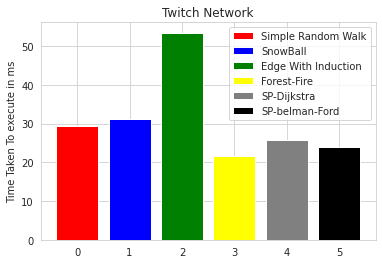

time: 286 ms


In [ ]:
plt.bar(labels[0], nw_twt[0], color ='red',label = "Simple Random Walk") 
plt.bar(labels[1], nw_twt[1], color ='blue',label = "SnowBall")
plt.bar(labels[2], nw_twt[2], color ='green',label = "Edge With Induction")
plt.bar(labels[3], nw_twt[3], color ='yellow',label = "Forest-Fire")
plt.bar(labels[4], nw_twt[4], color ='gray',label = "SP-Dijkstra")
plt.bar(labels[5], nw_twt[5], color ='black',label = "SP-belman-Ford")
plt.legend()
#plt.xlabel("") 
plt.ylabel("Time Taken To execute in ms") 
plt.title("Twitch Network") 
plt.show() 

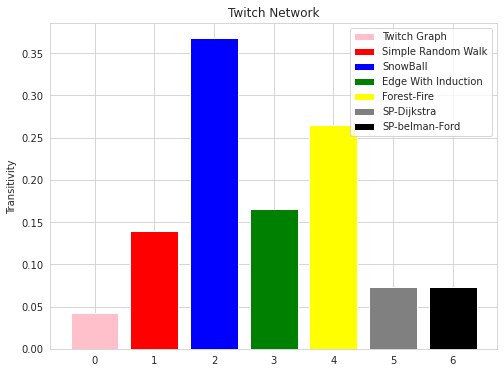

time: 1.76 s


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_twt = []
trans_twt.append(nx.transitivity(g_twt))
trans_twt.append(nx.transitivity(new_graph_twt))
trans_twt.append(nx.transitivity(new_graph_twt_SB))
trans_twt.append(nx.transitivity(new_graph_twt_RE))
trans_twt.append(nx.transitivity(new_graph_twt_FF))
trans_twt.append(nx.transitivity(n_graph_twt_SPD))
trans_twt.append(nx.transitivity(n_graph_twt_SPB))
plt.bar(labels1[0], trans_twt[0], color ='pink',label = "Twitch Graph") 
plt.bar(labels1[1], trans_twt[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_twt[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_twt[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_twt[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_twt[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_twt[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Twitch Network") 
plt.show() 

>>**Wikipdeia Network** \\
With 10% sampling


In [ ]:
number_of_nodes_wk = int(0.1*g_wk.number_of_nodes())
number_of_edges_wk = int(0.1*g_wk.number_of_edges())
sampler1_wk = RandomWalkSampler(number_of_nodes=number_of_nodes_wk )
sampler2_wk = SnowBallSampler(number_of_nodes=number_of_nodes_wk)
sampler3_wk = RandomEdgeSamplerWithInduction(number_of_edges=number_of_edges_wk)
sampler4_wk = ForestFireSampler(number_of_nodes=number_of_nodes_wk)
sampler6_wk = ShortestPathSampler(number_of_nodes=number_of_nodes_wk)


time: 66.2 ms


In [ ]:
print(nx.info(g_wk))

Name: 
Type: Graph
Number of nodes: 11631
Number of edges: 170918
Average degree:  29.3901
time: 19.3 ms


In [ ]:
nw_wk = []

time: 695 µs


Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_wk= sampler1_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 124 ms


Snowball

In [ ]:
tic = time.time()
new_graph_wk_SB = sampler2_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 91.1 ms


Random-Edge with Induction


In [ ]:

tic = time.time()
new_graph_wk_RE = sampler3_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 192 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_wk_FF = sampler4_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 134 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPD = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 262 ms


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPB = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 258 ms


In [ ]:
for i in range(len(nw_wk)):
  nw_wk[i] = nw_wk[i]*1000


time: 1.04 ms


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_wk = []
trans_wk.append(nx.transitivity(g_wk))
trans_wk.append(nx.transitivity(new_graph_wk))
trans_wk.append(nx.transitivity(new_graph_wk_SB))
trans_wk.append(nx.transitivity(new_graph_wk_RE))
trans_wk.append(nx.transitivity(new_graph_wk_FF))
trans_wk.append(nx.transitivity(n_graph_wk_SPD))
trans_wk.append(nx.transitivity(n_graph_wk_SPB))


<Figure size 576x432 with 0 Axes>

time: 4min 51s


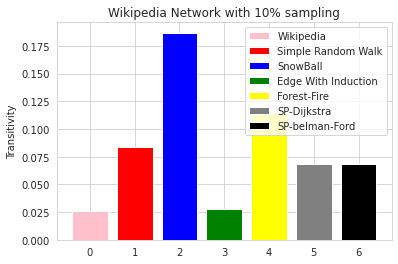

time: 300 ms


In [ ]:
plt.bar(labels1[0], trans_wk[0], color ='pink',label = "Wikipedia") 
plt.bar(labels1[1], trans_wk[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_wk[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_wk[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_wk[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_wk[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_wk[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Wikipedia Network with 10% sampling") 
plt.show() 

>>**Wikipdeia Network** \\
With 15% sampling


In [ ]:
number_of_nodes_wk = int(0.15*g_wk.number_of_nodes())
number_of_edges_wk = int(0.15*g_wk.number_of_edges())
sampler1_wk = RandomWalkSampler(number_of_nodes=number_of_nodes_wk )
sampler2_wk = SnowBallSampler(number_of_nodes=number_of_nodes_wk)
sampler3_wk = RandomEdgeSamplerWithInduction(number_of_edges=number_of_edges_wk)
sampler4_wk = ForestFireSampler(number_of_nodes=number_of_nodes_wk)
sampler6_wk = ShortestPathSampler(number_of_nodes=number_of_nodes_wk)


time: 72.3 ms


In [ ]:
print(nx.info(g_wk))

Name: 
Type: Graph
Number of nodes: 11631
Number of edges: 170918
Average degree:  29.3901
time: 24.1 ms


In [ ]:
nw_wk = []

time: 830 µs


Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_wk= sampler1_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 172 ms


Snowball

In [ ]:
tic = time.time()
new_graph_wk_SB = sampler2_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 98.4 ms


Random-Edge with Induction


In [ ]:

tic = time.time()
new_graph_wk_RE = sampler3_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 210 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_wk_FF = sampler4_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 190 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPD = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 366 ms


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPB = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)

time: 378 ms


In [ ]:
for i in range(len(nw_wk)):
  nw_wk[i] = nw_wk[i]*1000


time: 1.35 ms


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_wk = []
trans_wk.append(nx.transitivity(g_wk))
trans_wk.append(nx.transitivity(new_graph_wk))
trans_wk.append(nx.transitivity(new_graph_wk_SB))
trans_wk.append(nx.transitivity(new_graph_wk_RE))
trans_wk.append(nx.transitivity(new_graph_wk_FF))
trans_wk.append(nx.transitivity(n_graph_wk_SPD))
trans_wk.append(nx.transitivity(n_graph_wk_SPB))


<Figure size 576x432 with 0 Axes>

time: 6min


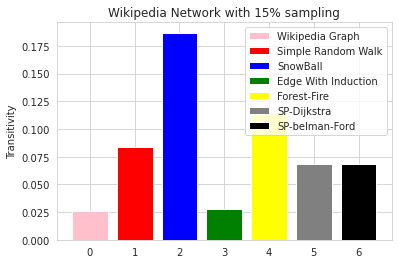

time: 307 ms


In [ ]:
plt.bar(labels1[0], trans_wk[0], color ='pink',label = "Wikipedia Graph") 
plt.bar(labels1[1], trans_wk[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_wk[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_wk[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_wk[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_wk[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_wk[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Wikipedia Network with 15% sampling") 
plt.show() 

>>**Wikipdeia Network** \\
With 20% sampling


In [ ]:
number_of_nodes_wk = int(0.20*g_wk.number_of_nodes())
number_of_edges_wk = int(0.20*g_wk.number_of_edges())
sampler1_wk = RandomWalkSampler(number_of_nodes=number_of_nodes_wk )
sampler2_wk = SnowBallSampler(number_of_nodes=number_of_nodes_wk)
sampler3_wk = RandomEdgeSamplerWithInduction(number_of_edges=number_of_edges_wk)
sampler4_wk = ForestFireSampler(number_of_nodes=number_of_nodes_wk)
sampler6_wk = ShortestPathSampler(number_of_nodes=number_of_nodes_wk)


In [ ]:
print(nx.info(g_wk))

In [ ]:
nw_wk = []

Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_wk= sampler1_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk))

Snowball

In [ ]:
tic = time.time()
new_graph_wk_SB = sampler2_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_SB))

Random-Edge with Induction


In [ ]:

tic = time.time()
new_graph_wk_RE = sampler3_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_RE))

Forest-Fire

In [ ]:
tic = time.time()
new_graph_wk_FF = sampler4_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_FF))

SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPD = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(n_graph_wk_SPD))

SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPB = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(n_graph_wk_SPD))

In [ ]:
for i in range(len(nw_wk)):
  nw_wk[i] = nw_wk[i]*1000


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_wk = []
trans_wk.append(nx.transitivity(g_wk))
trans_wk.append(nx.transitivity(new_graph_wk))
trans_wk.append(nx.transitivity(new_graph_wk_SB))
trans_wk.append(nx.transitivity(new_graph_wk_RE))
trans_wk.append(nx.transitivity(new_graph_wk_FF))
trans_wk.append(nx.transitivity(n_graph_wk_SPD))
trans_wk.append(nx.transitivity(n_graph_wk_SPB))


In [ ]:
plt.bar(labels1[0], trans_wk[0], color ='pink',label = "Twitch Graph") 
plt.bar(labels1[1], trans_wk[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_wk[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_wk[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_wk[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_wk[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_wk[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Wikipedia Network with 20% sampling") 
plt.show() 

>>**Wikipdeia Network** \\
With 30% sampling


In [ ]:
number_of_nodes_wk = int(0.30*g_wk.number_of_nodes())
number_of_edges_wk = int(0.30*g_wk.number_of_edges())
sampler1_wk = RandomWalkSampler(number_of_nodes=number_of_nodes_wk )
sampler2_wk = SnowBallSampler(number_of_nodes=number_of_nodes_wk)
sampler3_wk = RandomEdgeSamplerWithInduction(number_of_edges=number_of_edges_wk)
sampler4_wk = ForestFireSampler(number_of_nodes=number_of_nodes_wk)
sampler6_wk = ShortestPathSampler(number_of_nodes=number_of_nodes_wk)


time: 34.3 ms


In [ ]:
print(nx.info(g_wk))

Name: 
Type: Graph
Number of nodes: 11631
Number of edges: 170918
Average degree:  29.3901
time: 19.2 ms


In [ ]:
nw_wk = []

time: 1.46 ms


Random Walk Sampler

In [ ]:
tic = time.time()
new_graph_wk= sampler1_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk))

Name: 
Type: Graph
Number of nodes: 3489
Number of edges: 77863
Average degree:  44.6334
time: 610 ms


Snowball

In [ ]:
tic = time.time()
new_graph_wk_SB = sampler2_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_SB))

Name: 
Type: Graph
Number of nodes: 3489
Number of edges: 66480
Average degree:  38.1083
time: 406 ms


Random-Edge with Induction


In [ ]:

tic = time.time()
new_graph_wk_RE = sampler3_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_RE))

Name: 
Type: Graph
Number of nodes: 10326
Number of edges: 167140
Average degree:  32.3727
time: 781 ms


Forest-Fire

In [ ]:
tic = time.time()
new_graph_wk_FF = sampler4_wk.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(new_graph_wk_FF))

Name: 
Type: Graph
Number of nodes: 3489
Number of edges: 70957
Average degree:  40.6747
time: 562 ms


SP-Dijkastra

In [ ]:
tic = time.time()
samperr = ShortestPathSampler1(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPD = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(n_graph_wk_SPD))

Name: 
Type: Graph
Number of nodes: 3489
Number of edges: 35542
Average degree:  20.3737
time: 1 s


SP-Bellman-Ford

In [ ]:
tic = time.time()
samperr = ShortestPathSampler2(number_of_nodes=number_of_nodes_wk)
n_graph_wk_SPB = samperr.sample(g_wk)
toc = time.time()
nw_wk.append(toc-tic)
print(nx.info(n_graph_wk_SPD))

Name: 
Type: Graph
Number of nodes: 3489
Number of edges: 35542
Average degree:  20.3737
time: 1.02 s


In [ ]:
for i in range(len(nw_wk)):
  nw_wk[i] = nw_wk[i]*1000


time: 989 µs


In [ ]:
labels1 = [0,1,2,3,4,5,6]
plt.figure(figsize=(8,6))
trans_wk = []
trans_wk.append(nx.transitivity(g_wk))
trans_wk.append(nx.transitivity(new_graph_wk))
trans_wk.append(nx.transitivity(new_graph_wk_SB))
trans_wk.append(nx.transitivity(new_graph_wk_RE))
trans_wk.append(nx.transitivity(new_graph_wk_FF))
trans_wk.append(nx.transitivity(n_graph_wk_SPD))
trans_wk.append(nx.transitivity(n_graph_wk_SPB))


<Figure size 576x432 with 0 Axes>

time: 7min 20s


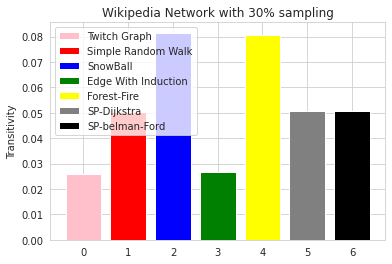

time: 304 ms


In [ ]:
plt.bar(labels1[0], trans_wk[0], color ='pink',label = "Twitch Graph") 
plt.bar(labels1[1], trans_wk[1], color ='red',label = "Simple Random Walk") 
plt.bar(labels1[2], trans_wk[2], color ='blue',label = "SnowBall")
plt.bar(labels1[3], trans_wk[3], color ='green',label = "Edge With Induction")
plt.bar(labels1[4], trans_wk[4], color ='yellow',label = "Forest-Fire")
plt.bar(labels1[5], trans_wk[5], color ='gray',label = "SP-Dijkstra")
plt.bar(labels1[6], trans_wk[6], color ='black',label = "SP-belman-Ford")
plt.legend()

#plt.xlabel("") 
plt.ylabel("Transitivity") 
plt.title("Wikipedia Network with 30% sampling") 
plt.show() 

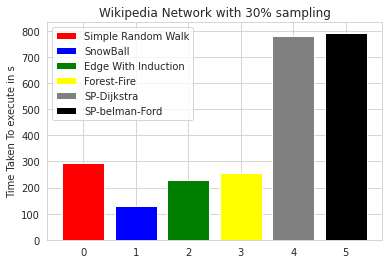

time: 282 ms


In [ ]:
plt.bar(labels[0], nw_wk[0], color ='red',label = "Simple Random Walk") 
plt.bar(labels[1], nw_wk[1], color ='blue',label = "SnowBall")
plt.bar(labels[2], nw_wk[2], color ='green',label = "Edge With Induction")
plt.bar(labels[3], nw_wk[3], color ='yellow',label = "Forest-Fire")
plt.bar(labels[4], nw_wk[4], color ='gray',label = "SP-Dijkstra")
plt.bar(labels[5], nw_wk[5], color ='black',label = "SP-belman-Ford")
plt.legend()
#plt.xlabel("") 
plt.ylabel("Time Taken To execute in s") 
plt.title("Wikipedia Network with 30% sampling") 
plt.show() 
